In [1]:
!pip install xmltodict

In [2]:
import pandas as pd
import requests
import io
import xmltodict
import json
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [3]:
base_url = 'https://gnps2.org/resultfile?task='
taskid = ['c66bf306c305449e856edc355e61ab20']

In [4]:
url_to_features = f'{base_url}{taskid[0]}&file=nf_output/clustering/featuretable_reformated.csv'
feat = pd.read_csv(io.StringIO(requests.get(url_to_features).text))

feat.head()

,row ID,row m/z,row retention time,intensity_measure,ion_mobility,ion_mobility_unit,ccs,correlation group ID,annotation network number,best ion,...,03_3297_POS_1-5_01_13.mzML Peak area,BRANCO-04_POS_1-1_01_24.mzML Peak area,07_3546_POS_1-9_01_19.mzML Peak area,06_3519_POS_1-8_01_18.mzML Peak area,BRANCO-04_POS_1-1_02_25.mzML Peak area,BRANCO-04_POS_1-1_04_27.mzML Peak area,BRANCO-04_POS_1-1_05_28.mzML Peak area,08_3546_POS_1-10_01_20.mzML Peak area,09_3546_POS_1-11_01_21.mzML Peak area,Unnamed: 38
0,130,242.910713,1.122737,area,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,1052.05030,657.4033,0.0,0.000000,0.0,470.46698,4.428668,NaN
1,144,288.939153,1.174439,area,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.00000,0.0000,0.0,0.000000,0.0,0.00000,1.055032,NaN
2,150,498.877576,1.137107,area,NaN,NaN,NaN,NaN,NaN,NaN,...,19.670237,0.000000,17.08586,0.0000,0.0,0.000000,0.0,323.90582,43.860830,NaN
3,164,408.899835,1.133442,area,NaN,NaN,NaN,NaN,NaN,NaN,...,427.415900,0.851661,0.00000,0.0000,0.0,0.000000,0.0,52.96320,2.827534,NaN
4,166,226.936371,1.150297,area,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,3111.80350,2491.3564,0.0,0.883998,0.0,520.79517,21.495990,NaN


In [5]:
feat.shape

(2514, 40)

In [10]:
cpd_name = pd.read_csv('gene2pathway2compound.tsv', sep='\t')
cpd_name = cpd_name.groupby('cluster index').first()
cpd_name.head()

,1,0_x,1_x,0_y,1_y,KEGGID,InChIKey,gene_names,compound_names,pathway_names
cluster index,,,,,,,,,,
1179,path:afm01100,AFUA_5G06840,path:afm01100,path:afm01100,cpd:C03539,cpd:C03539,IQFWYNFDWRYSRA-UHFFFAOYSA-N,class V chitinase,S-Ribosyl-L-homocysteine; S-D-Ribosyl-L-homocy...,Metabolic pathways - Aspergillus fumigatus
1186,path:afm01100,AFUA_5G06840,path:afm01100,path:afm01100,cpd:C16753,cpd:C16753,WWSYXEZEXMQWHT-UHFFFAOYSA-N,class V chitinase,Aflatoxin B2,Metabolic pathways - Aspergillus fumigatus
1309,path:afm00999,AFUA_6G14490,path:afm00999,path:afm00999,cpd:C09311,cpd:C09311,GUAFOGOEJLSQBT-UHFFFAOYSA-N,beta-glucosidase,"Scoparone; 6,7-Dimethoxycoumarin",Biosynthesis of various plant secondary metabo...
1416,path:afm01100,AFUA_5G06840,path:afm01100,path:afm01100,cpd:C00822,cpd:C00822,AHMIDUVKSGCHAU-UHFFFAOYSA-N,class V chitinase,Dopaquinone,Metabolic pathways - Aspergillus fumigatus
1666,path:afm01100,AFUA_5G06840,path:afm01100,path:afm01100,cpd:C00568,cpd:C00568,ALYNCZNDIQEVRV-UHFFFAOYSA-N,class V chitinase,4-Aminobenzoate; ABEE; 4-Aminobenzoic acid; p-...,Metabolic pathways - Aspergillus fumigatus


In [11]:
cpd_name.shape

(105, 10)

In [17]:
ion_annot = pd.merge(feat[['row ID', 'row m/z', 'row retention time']],
                    cpd_name[['KEGGID', 'InChIKey', 'compound_names']].reset_index(),
                    left_on='row ID', right_on='cluster index', how='left')
ion_annot.shape

(2514, 7)

In [18]:
feat[feat.columns[feat.columns.str.contains('Peak area')]]

,BRANCO-01_POS_1-1_02_6.mzML Peak area,BRANCO-01_POS_1-1_03_7.mzML Peak area,BRANCO-01_POS_1-1_04_8.mzML Peak area,QC-03_POS_1-2_01_23.mzML Peak area,QC-02_POS_1-2_01_17.mzML Peak area,BRANCO-01_POS_1-1_01_5.mzML Peak area,QC-01_POS_1-2_01_10.mzML Peak area,BRANCO-01_POS_1-1_05_9.mzML Peak area,BRANCO-02_POS_1-1_01_16.mzML Peak area,BRANCO-01_POS_1-1_01_4.mzML Peak area,...,BRANCO-04_POS_1-1_03_26.mzML Peak area,03_3297_POS_1-5_01_13.mzML Peak area,BRANCO-04_POS_1-1_01_24.mzML Peak area,07_3546_POS_1-9_01_19.mzML Peak area,06_3519_POS_1-8_01_18.mzML Peak area,BRANCO-04_POS_1-1_02_25.mzML Peak area,BRANCO-04_POS_1-1_04_27.mzML Peak area,BRANCO-04_POS_1-1_05_28.mzML Peak area,08_3546_POS_1-10_01_20.mzML Peak area,09_3546_POS_1-11_01_21.mzML Peak area
0,0.0,0.000000,0.000000,94.780570,179.408970,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,1052.05030,657.403300,0.000000,0.000000,0.000000,470.466980,4.428668
1,0.0,0.000000,0.000000,0.000000,0.000000,0.0,182.517960,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.055032
2,0.0,0.859347,0.877217,377.691350,395.419680,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,19.670237,0.000000,17.08586,0.000000,0.000000,0.000000,0.000000,323.905820,43.860830
3,0.0,0.000000,0.000000,233.637950,83.015594,0.0,6.407153,0.0,0.000000,0.000000,...,0.000000,427.415900,0.851661,0.00000,0.000000,0.000000,0.000000,0.000000,52.963200,2.827534
4,0.0,0.000000,0.000000,4.722153,559.624760,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,3111.80350,2491.356400,0.000000,0.883998,0.000000,520.795170,21.495990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509,0.0,0.000000,0.000000,119.050460,1.778629,0.0,0.000000,0.0,23.185396,0.000000,...,317.738700,18.114748,623.366600,137.39494,2.119057,520.281800,166.686500,150.412190,36.535942,22.574120
2510,0.0,0.000000,0.000000,992.794070,0.000000,0.0,0.000000,0.0,22.094757,0.000000,...,164.465770,31.931824,22.579866,50.89065,15.223765,13.998672,86.691986,16.017265,8064.464400,5943.958000
2511,0.0,0.000000,0.000000,185.101700,0.000000,0.0,0.000000,0.0,2251.600600,0.000000,...,38.396614,0.000000,32.841114,604.17834,25.145844,29.624443,48.396460,34.843243,1062.614500,173.180100
2512,0.0,0.000000,0.000000,10185.938000,8894.431000,0.0,0.000000,0.0,15.599170,49.963326,...,12.915283,184.945800,36.332610,6177.49800,26.068720,47.034164,35.341860,5.909606,359.635560,14012.586000


In [19]:
feat_area = feat[feat.columns[feat.columns.str.contains('Peak area')]]
[re.sub('_POS.+$', '', x) for x in feat_area.columns]

['BRANCO-01',
 'BRANCO-01',
 'BRANCO-01',
 'QC-03',
 'QC-02',
 'BRANCO-01',
 'QC-01',
 'BRANCO-01',
 'BRANCO-02',
 'BRANCO-01',
 '02_3297',
 '05_3519',
 '04_3519',
 'BRANCO-03',
 '01_3297',
 'BRANCO-04',
 '03_3297',
 'BRANCO-04',
 '07_3546',
 '06_3519',
 'BRANCO-04',
 'BRANCO-04',
 'BRANCO-04',
 '08_3546',
 '09_3546']

In [20]:
feat_area.columns = [re.sub('_POS.+$', '', x) for x in feat_area.columns]

In [21]:
feat_area = feat_area[[x for x in feat_area.columns if ('BR' not in x) and ('QC' not in x)]]
feat_area.head()

,02_3297,05_3519,04_3519,01_3297,03_3297,07_3546,06_3519,08_3546,09_3546
0,0.0,3.719095,3.820608,0.00000,0.000000,1052.05030,657.4033,470.46698,4.428668
1,0.0,0.000000,0.000000,295.85187,0.000000,0.00000,0.0000,0.00000,1.055032
2,0.0,660.706700,244.685000,0.00000,19.670237,17.08586,0.0000,323.90582,43.860830
3,0.0,231.985170,40.208305,0.00000,427.415900,0.00000,0.0000,52.96320,2.827534
4,0.0,0.000000,0.000000,0.00000,0.000000,3111.80350,2491.3564,520.79517,21.495990


In [22]:
feat_area.sum()==0

,0
02_3297,False
05_3519,False
04_3519,False
01_3297,False
03_3297,False
07_3546,False
06_3519,False
08_3546,False
09_3546,False


In [23]:
(feat_area.sum(axis=1)==0).sum()

117

In [24]:
feat_area.shape

(2514, 9)

In [25]:
feat_area[~(feat_area.sum(axis=1)==0)].shape

(2397, 9)

In [27]:
ion_annot = ion_annot[~(feat_area.sum(axis=1)==0)]
ion_annot.shape

(2397, 7)

In [28]:
feat_area = feat_area[~(feat_area.sum(axis=1)==0)]

In [15]:
feat_area

,02_3297,05_3519,04_3519,01_3297,03_3297,07_3546,06_3519,08_3546,09_3546
0,0.000000,3.719095,3.820608,0.00000,0.000000,1052.05030,657.403300,470.466980,4.428668
1,0.000000,0.000000,0.000000,295.85187,0.000000,0.00000,0.000000,0.000000,1.055032
2,0.000000,660.706700,244.685000,0.00000,19.670237,17.08586,0.000000,323.905820,43.860830
3,0.000000,231.985170,40.208305,0.00000,427.415900,0.00000,0.000000,52.963200,2.827534
4,0.000000,0.000000,0.000000,0.00000,0.000000,3111.80350,2491.356400,520.795170,21.495990
...,...,...,...,...,...,...,...,...,...
2509,28.660118,33.901035,109.805050,0.00000,18.114748,137.39494,2.119057,36.535942,22.574120
2510,21.199175,377.733600,361.549680,0.00000,31.931824,50.89065,15.223765,8064.464400,5943.958000
2511,0.000000,103.380930,308.408080,0.00000,0.000000,604.17834,25.145844,1062.614500,173.180100
2512,24.043785,2052.491700,11654.725000,0.00000,184.945800,6177.49800,26.068720,359.635560,14012.586000


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


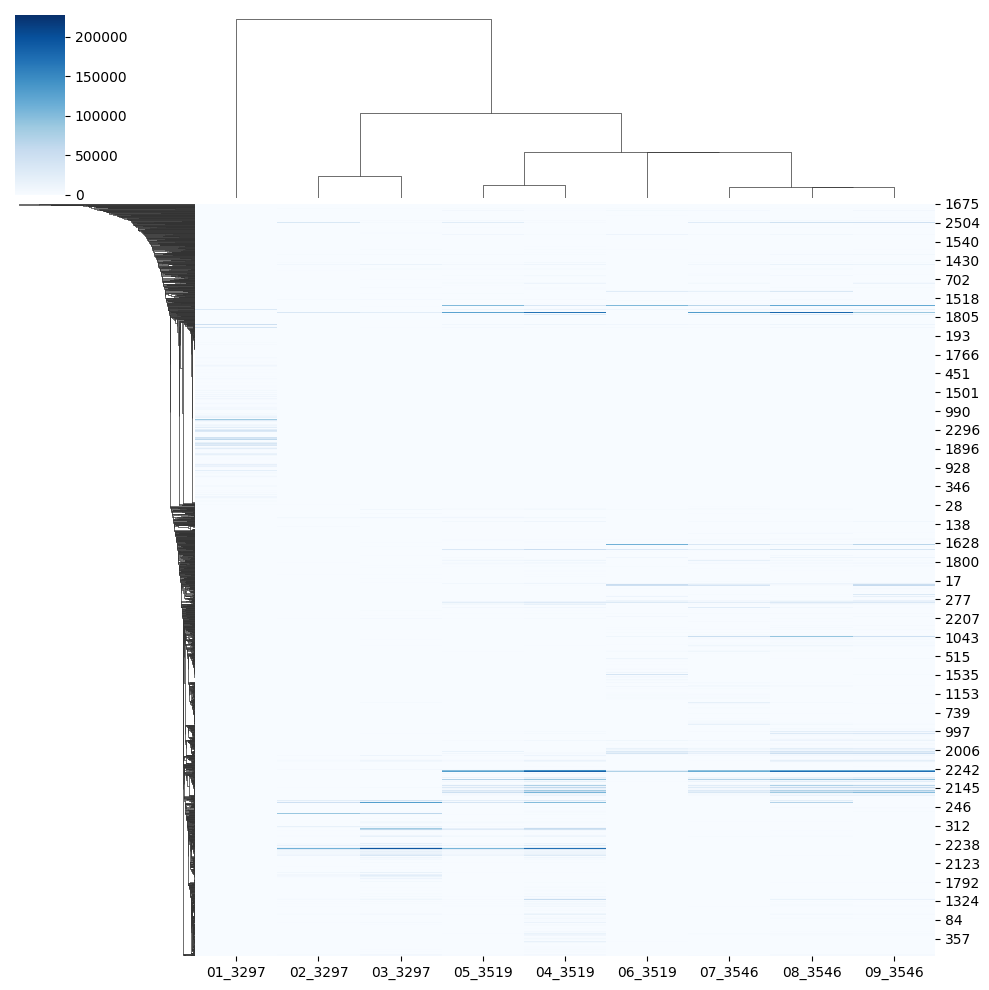

In [29]:
#z_score Either 0 (rows) or 1 (columns).
sns.clustermap(feat_area, metric="correlation", method="single", cmap="Blues")

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


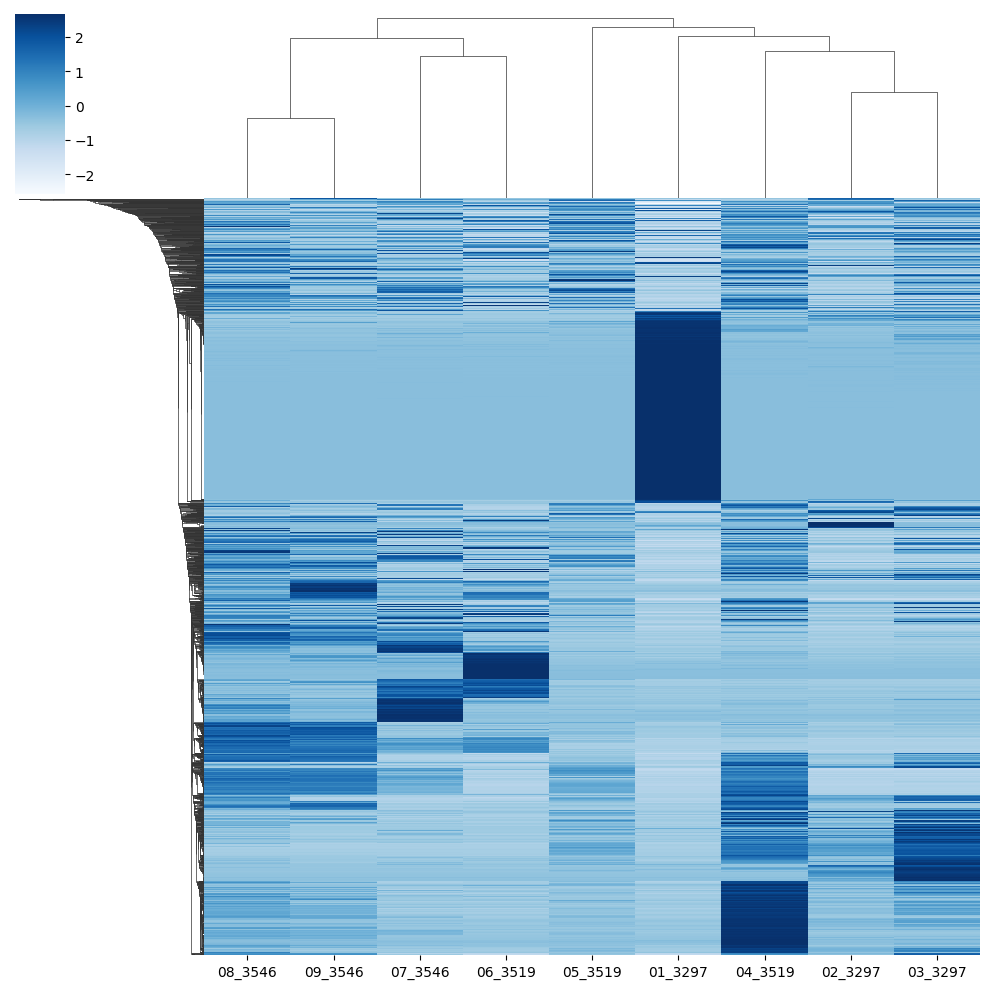

In [30]:
#z_score Either 0 (rows) or 1 (columns).
sns.clustermap(feat_area, metric="correlation", method="single", cmap="Blues", z_score=0, yticklabels=False)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


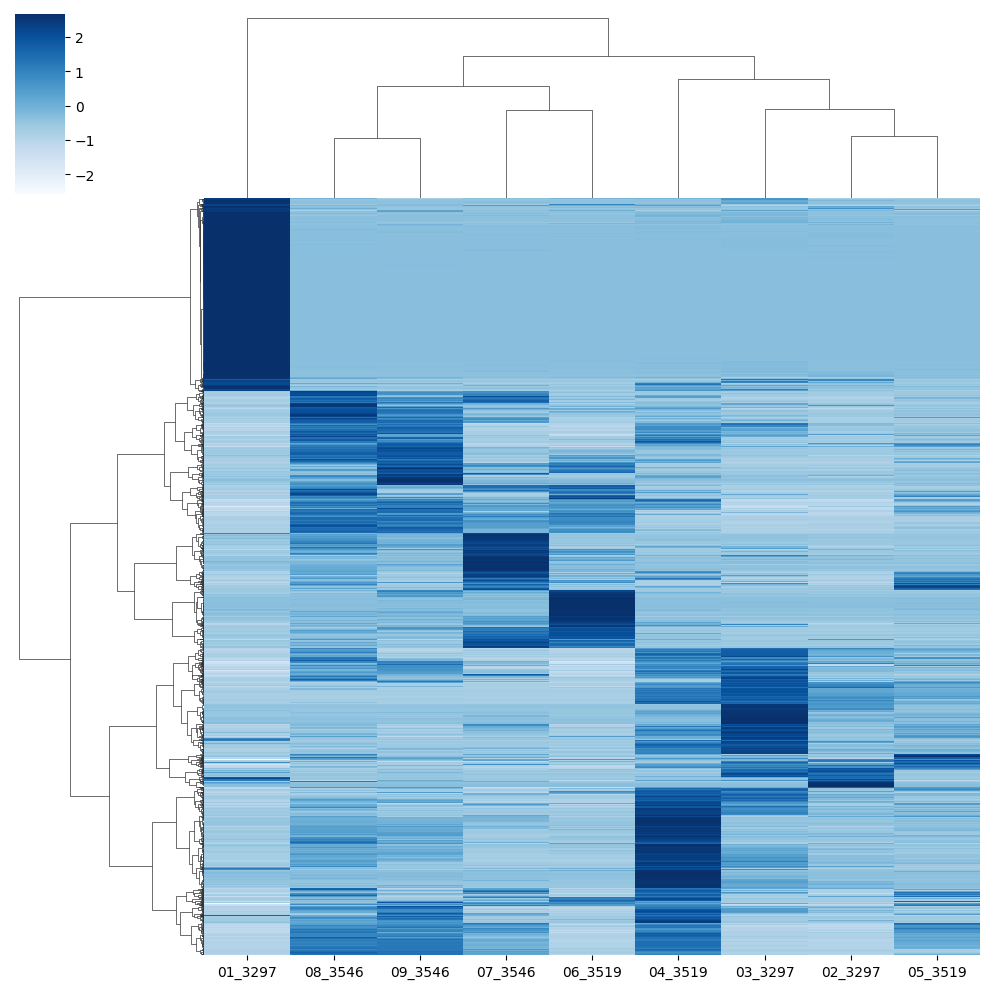

In [31]:
sns.clustermap(feat_area, metric="euclidean", method="ward", cmap="Blues", z_score=0, yticklabels=False)

In [32]:
feat_area = feat_area.apply(lambda x: x/x.sum(), axis=1)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


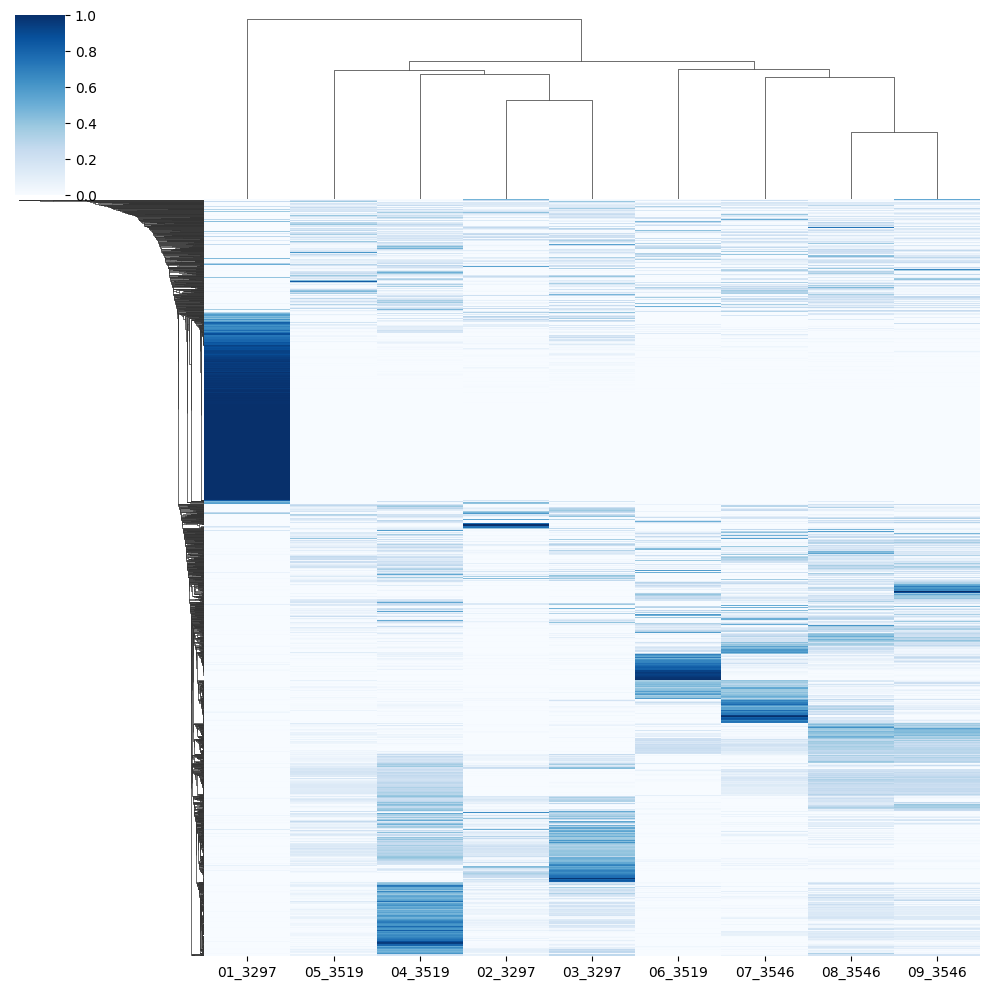

In [33]:
sns.clustermap(feat_area, metric="correlation", method="single", cmap="Blues", yticklabels=False)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


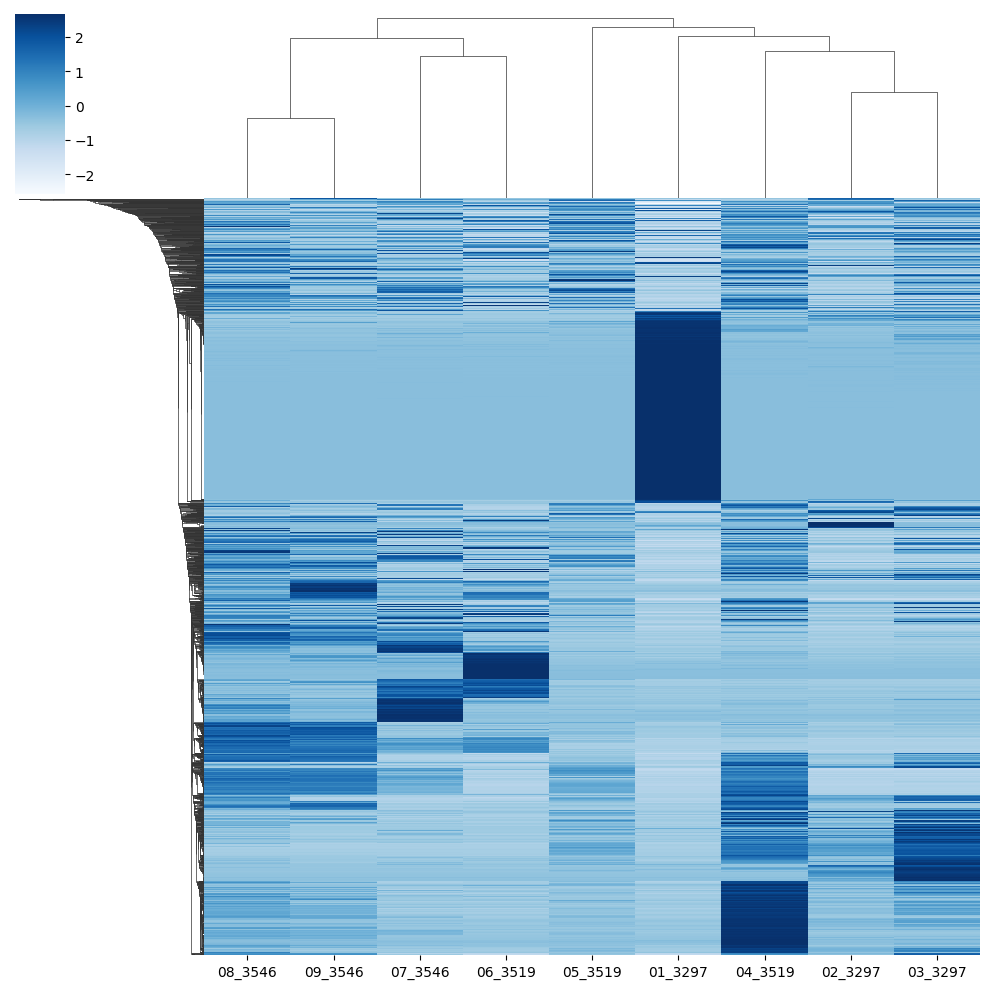

In [34]:
sns.clustermap(feat_area, metric="correlation", method="single", cmap="Blues", yticklabels=False, z_score=0)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


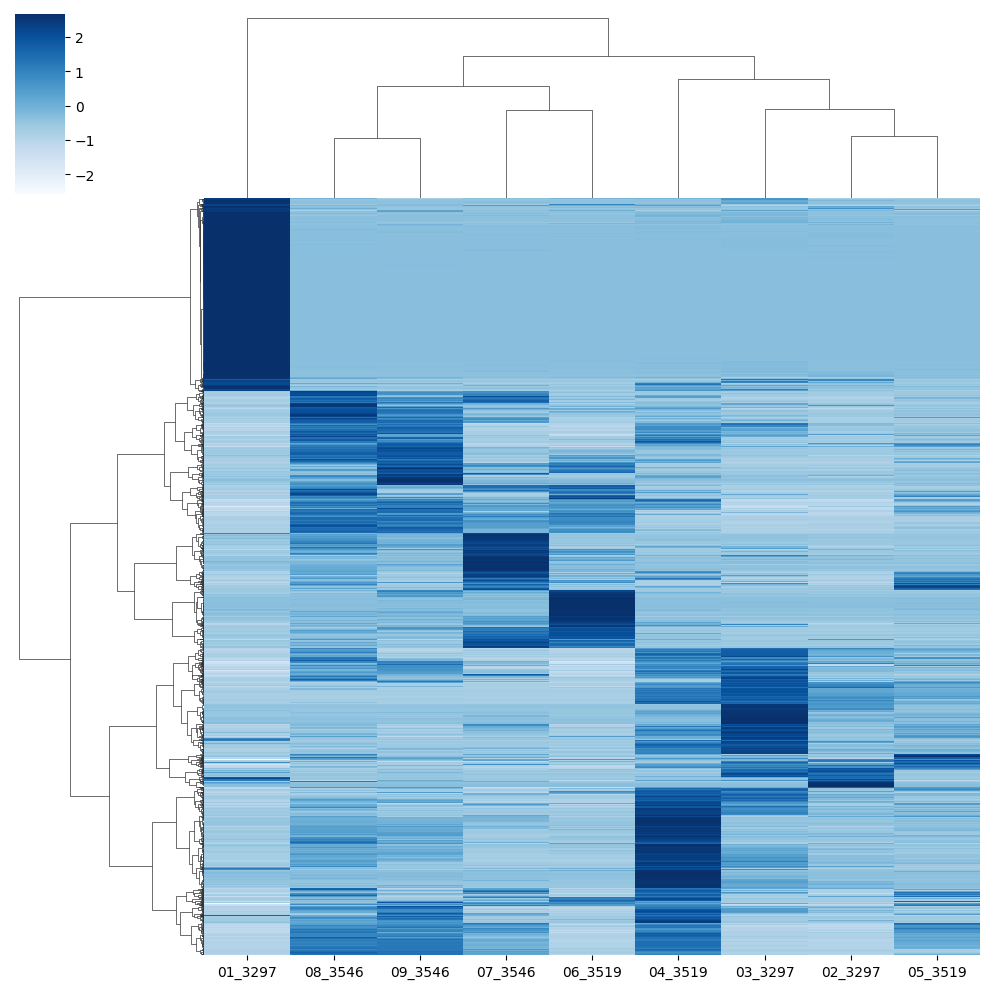

In [35]:
sns.clustermap(feat_area, metric="euclidean", method="ward", cmap="Blues", yticklabels=False, z_score=0)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


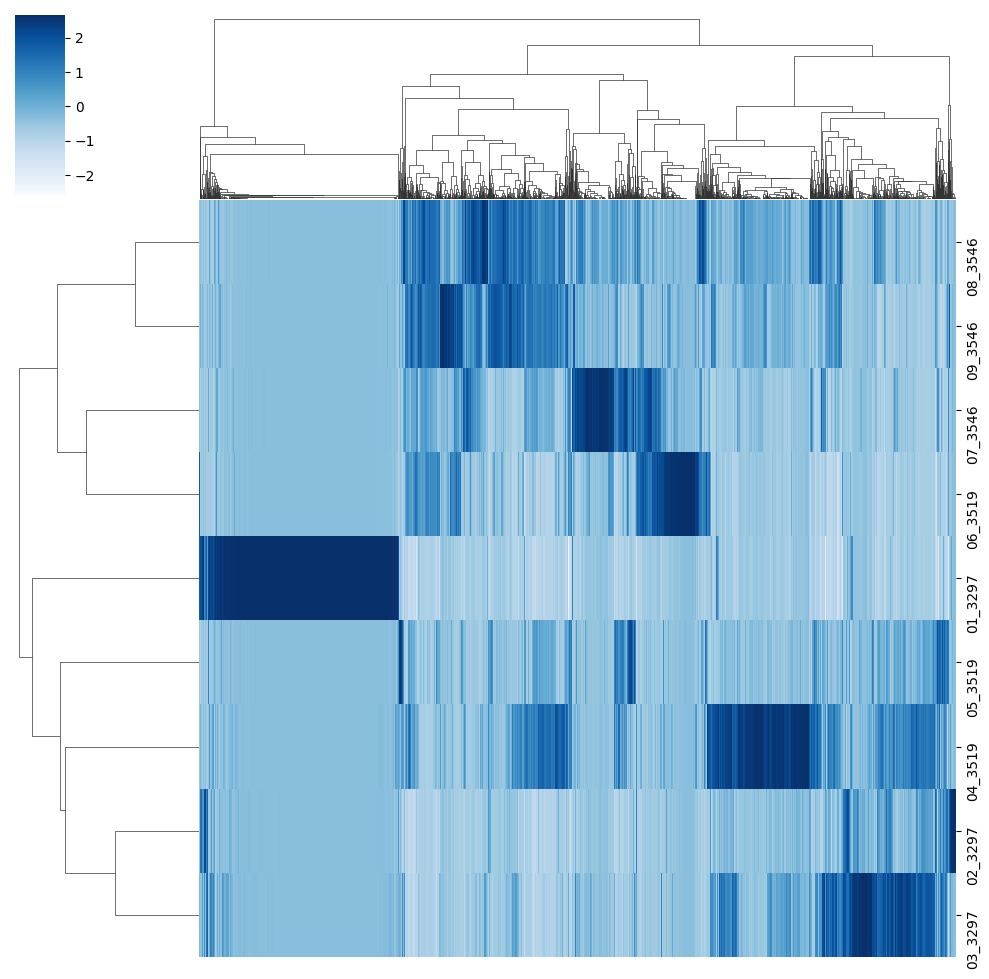

In [36]:
corr = sns.clustermap(feat_area.T, metric="correlation", method="average",
                      cmap="Blues", xticklabels=False, z_score=1)

In [37]:
corr.dendrogram_row.reordered_ind

[7, 8, 5, 6, 3, 1, 2, 0, 4]

In [38]:
corr.dendrogram_col.reordered_ind

[1162,
 2197,
 471,
 2005,
 2312,
 42,
 28,
 13,
 39,
 1900,
 2233,
 1914,
 31,
 2198,
 2147,
 2163,
 1901,
 2155,
 57,
 1929,
 2006,
 2196,
 2117,
 2164,
 2179,
 1899,
 2013,
 2121,
 16,
 1918,
 1644,
 1758,
 1521,
 1903,
 92,
 145,
 86,
 1917,
 1934,
 136,
 2137,
 1374,
 360,
 1931,
 1765,
 658,
 1273,
 1380,
 591,
 1948,
 1960,
 1773,
 1358,
 1814,
 2259,
 1751,
 1562,
 968,
 1266,
 2031,
 553,
 1347,
 2337,
 535,
 1774,
 788,
 1635,
 1933,
 1075,
 2276,
 1051,
 2200,
 1927,
 1255,
 146,
 487,
 994,
 1334,
 1813,
 1937,
 355,
 1164,
 1421,
 443,
 1152,
 1560,
 1333,
 1585,
 1331,
 486,
 979,
 1995,
 2322,
 1922,
 2150,
 1925,
 15,
 25,
 2120,
 1379,
 1999,
 2084,
 1766,
 2011,
 1200,
 1362,
 532,
 708,
 209,
 554,
 1916,
 1015,
 1304,
 1094,
 1214,
 72,
 179,
 318,
 1441,
 1736,
 478,
 1908,
 1385,
 1671,
 1283,
 2323,
 590,
 1443,
 480,
 2366,
 112,
 1375,
 1614,
 2350,
 485,
 129,
 165,
 1081,
 219,
 1309,
 1622,
 1078,
 1396,
 1909,
 632,
 567,
 431,
 1104,
 224,
 837,
 317,
 552

In [52]:
cmap_feat = feat_area.copy()
cmap_feat.reset_index(drop=True, inplace=True)
cmap_feat.head()

,02_3297,05_3519,04_3519,01_3297,03_3297,07_3546,06_3519,08_3546,09_3546
0,0.0,0.001697,0.001743,0.000000,0.000000,0.479974,0.299925,0.214640,0.002020
1,0.0,0.000000,0.000000,0.996447,0.000000,0.000000,0.000000,0.000000,0.003553
2,0.0,0.504389,0.186795,0.000000,0.015016,0.013043,0.000000,0.247272,0.033484
3,0.0,0.307102,0.053228,0.000000,0.565814,0.000000,0.000000,0.070113,0.003743
4,0.0,0.000000,0.000000,0.000000,0.000000,0.506359,0.405398,0.084745,0.003498


In [53]:
cmap_feat.apply(lambda x: (x-x.mean())/x.std()).std()

,0
02_3297,1.0
05_3519,1.0
04_3519,1.0
01_3297,1.0
03_3297,1.0
07_3546,1.0
06_3519,1.0
08_3546,1.0
09_3546,1.0


In [54]:
cmap_feat = cmap_feat.apply(lambda x: (x-x.mean())/x.std())

In [55]:
cmap_feat = cmap_feat.iloc[corr.dendrogram_col.reordered_ind,
                           corr.dendrogram_row.reordered_ind]

In [56]:
cmap_feat.shape

(2397, 9)

In [58]:
cmap_feat.head()

,08_3546,09_3546,07_3546,06_3519,01_3297,05_3519,04_3519,02_3297,03_3297
1162,-0.852982,-0.721064,-0.365650,2.062439,0.452136,-0.601079,-0.793834,-0.435443,-0.217782
2197,-0.437929,-0.479552,-0.578728,1.289696,-0.070635,0.852063,-0.793834,0.744096,0.100800
471,-0.004070,0.763560,0.052673,-0.364722,0.130671,-0.675385,0.576634,-0.449855,-0.627786
2005,-0.272935,0.068833,-0.232929,-0.100937,0.029088,-0.043166,-0.274610,1.426158,-0.144787
2312,-0.778311,-0.537062,-0.578728,-0.460782,0.468660,-0.675385,-0.630895,3.062194,0.080482


In [47]:
ion_annot.head()

,row ID,row m/z,row retention time,cluster index,KEGGID,InChIKey,compound_names
0,130,242.910713,1.122737,NaN,NaN,NaN,NaN
1,144,288.939153,1.174439,NaN,NaN,NaN,NaN
2,150,498.877576,1.137107,NaN,NaN,NaN,NaN
3,164,408.899835,1.133442,NaN,NaN,NaN,NaN
4,166,226.936371,1.150297,NaN,NaN,NaN,NaN


In [46]:
len(corr.dendrogram_col.reordered_ind)

2397

In [49]:
ion_annot.reset_index(drop=True).loc[corr.dendrogram_col.reordered_ind].shape

(2397, 7)

In [71]:
ion_annot.head()

,row ID,row m/z,row retention time,cluster index,KEGGID,InChIKey_x,compound_names,#Scan#,SpectrumID,Compound_Name,InChIKey_y
0,130,242.910713,1.122737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,144,288.939153,1.174439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,150,498.877576,1.137107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,164,408.899835,1.133442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,166,226.936371,1.150297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
ion_annot.reset_index(drop=True).loc[corr.dendrogram_col.reordered_ind].to_csv('ion_annot_hca_cor_average_norm_scale.tsv', sep='\t')

In [59]:
(cmap_feat.style.background_gradient(cmap="Blues")
           .to_excel("hca_cor_average_norm_scale.xlsx", engine="openpyxl"))

In [70]:
ion_annot = pd.merge(ion_annot, dbmatch.loc[~(dbmatch.InChIKey.duplicated() | dbmatch['class'].isna()),
                                           ['#Scan#', 'SpectrumID', 'Compound_Name', 'InChIKey']],
                     left_on='row ID', right_on='#Scan#', how='left')
ion_annot.shape

(2397, 11)

In [73]:
feat.loc[feat['row ID']==3515, feat.columns[feat.columns.str.contains('3297')]]

,02_3297_POS_1-4_01_12.mzML Peak area,01_3297_POS_1-3_01_11.mzML Peak area,03_3297_POS_1-5_01_13.mzML Peak area
429,457.63385,0.0,1851.0671


In [74]:
cmap_feat.loc[429]

,429
08_3546,-0.903178
09_3546,-0.752787
07_3546,-0.578728
06_3519,-0.460782
01_3297,1.867514
05_3519,-0.675385
04_3519,-0.793834
02_3297,-0.449855
03_3297,-0.627786


In [63]:
feat_area.loc[72]

,72
02_3297,0.000000
05_3519,0.000000
04_3519,0.091027
01_3297,0.905965
03_3297,0.003008
07_3546,0.000000
06_3519,0.000000
08_3546,0.000000
09_3546,0.000000


In [ ]:
set([x[3:] for x in feat_area.columns])

{'3297', '3519', '3546'}

In [ ]:
minha_paleta = dict(zip(set([x[3:] for x in feat_area.columns]), ["orange","yellow","brown"]))
cores_linhas = [minha_paleta[x[3:]] for x in feat_area.columns]
cores_linhas

['yellow',
 'brown',
 'brown',
 'yellow',
 'yellow',
 'orange',
 'brown',
 'orange',
 'orange']

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


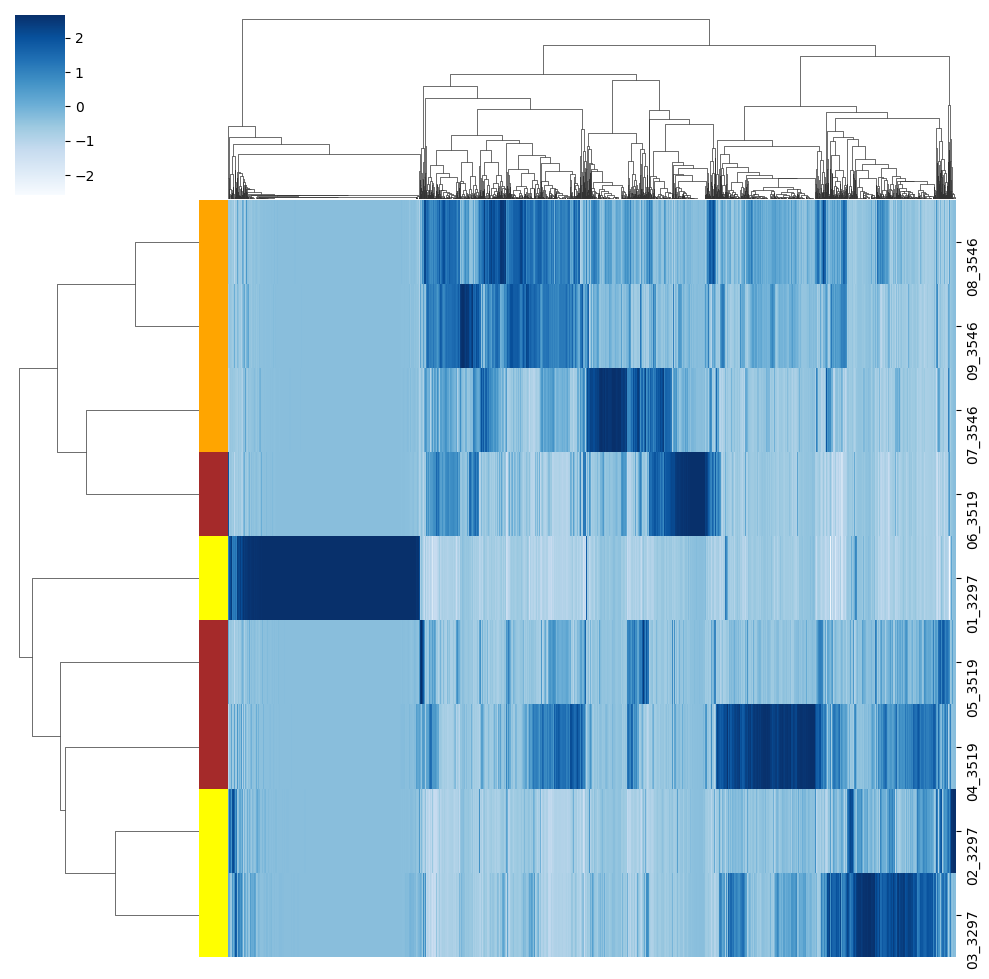

In [ ]:
sns.clustermap(feat_area.T, metric="correlation", method="average", cmap="Blues",
               xticklabels=False, z_score=1, row_colors=cores_linhas)

In [ ]:
minha_paleta

{'3546': 'orange', '3297': 'yellow', '3519': 'brown'}

In [ ]:
url_to_metadata = f'{base_url}{taskid[0]}&file=nf_output/metadata/merged_metadata.tsv'
meta = pd.read_csv(io.StringIO(requests.get(url_to_metadata).text), sep='\t')
meta.head()

,filename,ATTRIBUTE_samplename
0,01_3297_POS_1-3_01_11.mzML,3297
1,02_3297_POS_1-4_01_12.mzML,3297
2,03_3297_POS_1-5_01_13.mzML,3297
3,04_3519_POS_1-6_01_14.mzML,3519
4,05_3519_POS_1-7_01_15.mzML,3519


In [66]:
url_to_db = f'{base_url}{taskid[0]}&file=nf_output/library/merged_results_with_gnps.tsv'
dbmatch = pd.read_csv(io.StringIO(requests.get(url_to_db).text), sep='\t')
dbmatch = dbmatch.dropna(subset = ["INCHI"]).loc[(dbmatch.INCHI != " ") & (dbmatch.INCHI != "")]
dbmatch["INCHI"] = dbmatch.INCHI.str.strip('"')
dbmatch["INCHI"] = ["InChI=" + x if not x.startswith("InChI=") else x for x in dbmatch.INCHI.to_list()]

dbmatch.head()

,SpectrumID,#Scan#,SpectrumFile,LibraryName,MQScore,TIC_Query,RT_Query,MZErrorPPM,SharedPeaks,MassDiff,...,molecular_formula,InChIKey,InChIKey-Planar,superclass,class,subclass,npclassifier_superclass,npclassifier_class,npclassifier_pathway,library_usi
0,CCMSLIB00003135405,9609,spectra_filtered.mgf,GNPS-NIST14-MATCHES.mgf,0.957822,39291,0,28.2471,6,0.006302,...,C12H14O4,FLKPEMZONWLCSK-UHFFFAOYSA-N,FLKPEMZONWLCSK,Benzenoids,Benzene and substituted derivatives,Benzoic acids and derivatives,Phenolic acids (C6-C1),Shikimic acids and derivatives|Simple phenolic...,Shikimates and Phenylpropanoids,mzspec:GNPS:GNPS-LIBRARY:CCMSLIB00003135405
1,CCMSLIB00005721203,8394,spectra_filtered.mgf,GNPS-NIH-NATURALPRODUCTSLIBRARY_ROUND2_POSITIV...,0.956524,141251,0,1260.2100,6,0.992310,...,C24H30O4,FCWYNTDTQPCVPG-UQWVPHONSA-N,FCWYNTDTQPCVPG,NaN,NaN,NaN,Coumarins,Simple coumarins,Shikimates and Phenylpropanoids,mzspec:GNPS:GNPS-LIBRARY:CCMSLIB00005721203
2,CCMSLIB00000848908,9087,spectra_filtered.mgf,GNPS-NIH-NATURALPRODUCTSLIBRARY_ROUND2_POSITIV...,0.947473,70040,0,62.5101,10,0.021698,...,C18H18O7,XJOBKBUGVMLSEJ-UHFFFAOYSA-N,XJOBKBUGVMLSEJ,Benzenoids,Benzene and substituted derivatives,Benzophenones,Aromatic polyketides,Benzophenones,Polyketides,mzspec:GNPS:GNPS-LIBRARY:CCMSLIB00000848908
3,CCMSLIB00000848908,9058,spectra_filtered.mgf,GNPS-NIH-NATURALPRODUCTSLIBRARY_ROUND2_POSITIV...,0.934343,17633,0,23.0347,9,0.007996,...,C18H18O7,XJOBKBUGVMLSEJ-UHFFFAOYSA-N,XJOBKBUGVMLSEJ,Benzenoids,Benzene and substituted derivatives,Benzophenones,Aromatic polyketides,Benzophenones,Polyketides,mzspec:GNPS:GNPS-LIBRARY:CCMSLIB00000848908
4,CCMSLIB00000848810,3162,spectra_filtered.mgf,GNPS-NIH-NATURALPRODUCTSLIBRARY_ROUND2_POSITIV...,0.934056,8033,0,70.4568,7,0.020019,...,C16H17N3O2,RYFZBPVMVYTEKZ-UHFFFAOYSA-N,RYFZBPVMVYTEKZ,Organic acids and derivatives,Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Peptide alkaloids|Small peptides,Dipeptides|Indole diketopiperazine alkaloids (...,Alkaloids|Amino acids and Peptides,mzspec:GNPS:GNPS-LIBRARY:CCMSLIB00000848810


In [67]:
dbmatch.columns

Index(['SpectrumID', '#Scan#', 'SpectrumFile', 'LibraryName', 'MQScore',
       'TIC_Query', 'RT_Query', 'MZErrorPPM', 'SharedPeaks', 'MassDiff',
       'SpecMZ', 'SpecCharge', 'FileScanUniqueID', 'NumberHits',
       'Compound_Name', 'Ion_Source', 'Instrument', 'Compound_Source', 'PI',
       'Data_Collector', 'Adduct', 'Precursor_MZ', 'ExactMass', 'Charge',
       'CAS_Number', 'Pubmed_ID', 'Smiles', 'INCHI', 'INCHI_AUX',
       'Library_Class', 'IonMode', 'Organism', 'LibMZ', 'UpdateWorkflowName',
       'LibraryQualityString', 'tags', 'molecular_formula', 'InChIKey',
       'InChIKey-Planar', 'superclass', 'class', 'subclass',
       'npclassifier_superclass', 'npclassifier_class', 'npclassifier_pathway',
       'library_usi'],
      dtype='object')

In [69]:
dbmatch.loc[~(dbmatch.InChIKey.duplicated() | dbmatch['class'].isna()),
            ['#Scan#', 'SpectrumID', 'Compound_Name', 'InChIKey']]

,#Scan#,SpectrumID,Compound_Name,InChIKey
0,9609,CCMSLIB00003135405,Spectral Match to Diethyl phthalate from NIST14,FLKPEMZONWLCSK-UHFFFAOYSA-N
2,9087,CCMSLIB00000848908,NCGC00169225-02!methyl 5-hydroxy-2-(2-hydroxy-...,XJOBKBUGVMLSEJ-UHFFFAOYSA-N
4,3162,CCMSLIB00000848810,"NCGC00169940-02!3-(1H-indol-3-ylmethyl)-2,3,6,...",RYFZBPVMVYTEKZ-UHFFFAOYSA-N
5,6810,CCMSLIB00000854451,"NCGC00380614-01_C24H23N5O4_2H-Pyrazino[2,1-b]q...",DQQCCKFZJNINST-VCPZKGNQSA-N
8,6981,CCMSLIB00005727071,Massbank:AC000911 Fumiquinazoline F,SUVZUTHVKIBYOH-KPZWWZAWSA-N
9,6770,CCMSLIB00000853700,"NCGC00169614-02_C24H21N5O4_(1S,3S,12S,14R,27S)...",YYLAARMDRFESOL-CVAYNVNESA-N
13,11269,CCMSLIB00000005509,Drospirenone,METQSPRSQINEEU-HXCATZOESA-N
14,11538,CCMSLIB00000853386,"NCGC00385123-01_C22H30O6_7b,9-Dihydroxy-3-(hyd...",WZYGIALDVOKLLL-UHFFFAOYSA-N
16,17062,CCMSLIB00005738751,Massbank:RP019902 Dibutylphthalate|dibutyl pht...,DOIRQSBPFJWKBE-UHFFFAOYSA-N
17,17044,CCMSLIB00005721496,"NCGC00170012-03!5-hydroxy-3-[(2S,3R,4S,5S)-4-h...",TXCAFRVNHJUDMI-AOHWRSHGSA-N


In [ ]:
dbmatch.shape

(109, 46)

In [ ]:
len(dbmatch.InChIKey.unique())

41

In [ ]:
dbmatch['class'].isna()

,class
0,False
1,True
2,False
3,False
4,False
...,...
112,False
113,False
114,False
115,False


In [ ]:
dbmatch.loc[~(dbmatch.InChIKey.duplicated() | dbmatch['class'].isna()), 'class'].value_counts()

,count
class,
Steroids and steroid derivatives,6
Prenol lipids,4
Organooxygen compounds,4
Benzene and substituted derivatives,3
Carboxylic acids and derivatives,3
Diazanaphthalenes,3
Fatty Acyls,3
Indoles and derivatives,2
Flavonoids,1


<Axes: ylabel='count'>

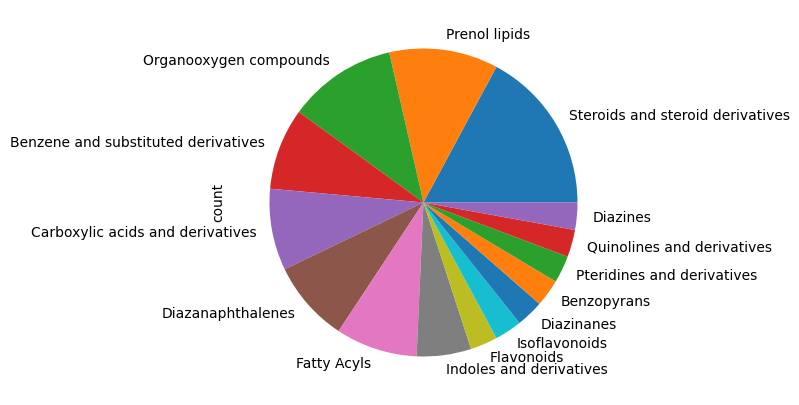

In [ ]:
dbmatch.loc[~(dbmatch.InChIKey.duplicated() | dbmatch['class'].isna()), 'class'].value_counts().plot.pie(y='count', figsize=(5, 5))

<Axes: ylabel='count'>

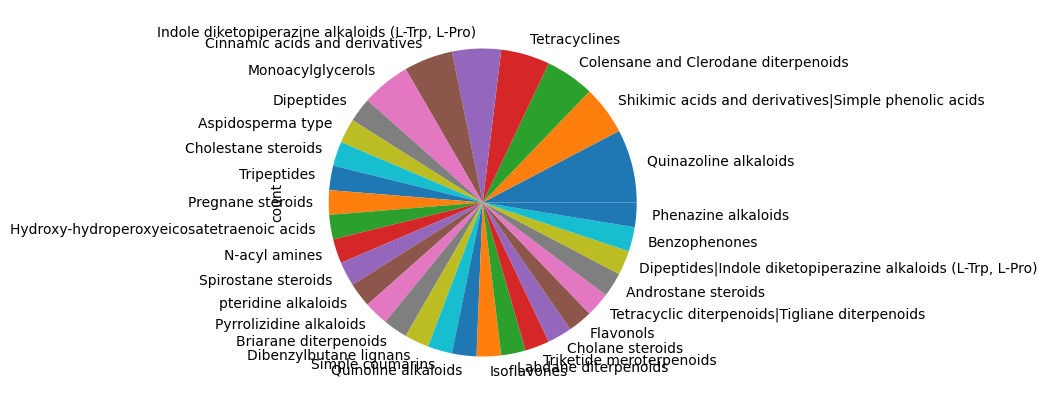

In [ ]:
dbmatch.loc[~(dbmatch.InChIKey.duplicated() | dbmatch['npclassifier_class'].isna()), 'npclassifier_class'].value_counts().plot.pie(y='count', figsize=(5, 5))

In [ ]:
!unzip kegg_db.zip

Archive:  kegg_db.zip
  inflating: python_libraries/pyclassrich/notebooks/kegg_database.tsv  


In [ ]:
kegg = pd.read_csv('python_libraries/pyclassrich/notebooks/kegg_database.tsv', sep='\t')
kegg.head()

,SID,KEGGID,CID,CanonicalSMILES,InChI,InChIKey,Formula
0,3303,cpd:C00001,962,O,InChI=1S/H2O/h1H2,XLYOFNOQVPJJNP-UHFFFAOYSA-N,H2O
1,3304,cpd:C00002,5957,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(...,InChI=1S/C10H16N5O13P3/c11-8-5-9(13-2-12-8)15(...,ZKHQWZAMYRWXGA-UHFFFAOYSA-N,C10H16N5O13P3
2,3305,cpd:C00003,5893,C1=CC(=C[N+](=C1)C2C(C(C(O2)COP(=O)(O)OP(=O)(O...,InChI=1S/C21H27N7O14P2/c22-17-12-19(25-7-24-17...,BAWFJGJZGIEFAR-UHFFFAOYSA-O,C21H28N7O14P2+
3,3306,cpd:C00004,439153,C1C=CN(C=C1C(=O)N)C2C(C(C(O2)COP(=O)(O)OP(=O)(...,InChI=1S/C21H29N7O14P2/c22-17-12-19(25-7-24-17...,BOPGDPNILDQYTO-UHFFFAOYSA-N,C21H29N7O14P2
4,3307,cpd:C00005,5884,C1C=CN(C=C1C(=O)N)C2C(C(C(O2)COP(=O)(O)OP(=O)(...,InChI=1S/C21H30N7O17P3/c22-17-12-19(25-7-24-17...,ACFIXJIJDZMPPO-UHFFFAOYSA-N,C21H30N7O17P3


In [ ]:
gnps_kegg_map = pd.merge(kegg, dbmatch[['InChIKey', 'SpectrumID', '#Scan#']], on='InChIKey')
gnps_kegg_map.head()

,SID,KEGGID,CID,CanonicalSMILES,InChI,InChIKey,Formula,SpectrumID,#Scan#
0,4864,cpd:C01727,5326566,CC1=CC2=C(C=C1C)N=C3C(=N2)C(=O)NC(=O)N3,InChI=1S/C12H10N4O2/c1-5-3-7-8(4-6(5)2)14-10-9...,ZJTJUVIJVLLGSP-UHFFFAOYSA-N,C12H10N4O2,CCMSLIB00005883215,3515
1,4864,cpd:C01727,5326566,CC1=CC2=C(C=C1C)N=C3C(=N2)C(=O)NC(=O)N3,InChI=1S/C12H10N4O2/c1-5-3-7-8(4-6(5)2)14-10-9...,ZJTJUVIJVLLGSP-UHFFFAOYSA-N,C12H10N4O2,CCMSLIB00005883215,3502
2,11087,cpd:C08894,441884,CC1CCC2(C(C3C(O2)CC4C3(CCC5C4CC=C6C5(CCC(C6)OC...,InChI=1S/C45H72O17/c1-19-8-13-45(55-18-19)20(2...,OLAMGHNQGZIWHZ-UHFFFAOYSA-N,C45H72O17,CCMSLIB00006476870,11697
3,582902,cpd:C12512,443872,CC12CCC(=O)C=C1CC(C3C24C(O4)CC5(C3CCC56CCC(=O)...,InChI=1S/C24H30O6/c1-21-7-4-14(25)10-13(21)11-...,JUKPWJGBANNWMW-UHFFFAOYSA-N,C24H30O6,CCMSLIB00012268116,11738
4,7846987,cpd:C14175,6781,CCOC(=O)C1=CC=CC=C1C(=O)OCC,InChI=1S/C12H14O4/c1-3-15-11(13)9-7-5-6-8-10(9...,FLKPEMZONWLCSK-UHFFFAOYSA-N,C12H14O4,CCMSLIB00003135405,9609


In [ ]:
gnps_kegg_map.shape

(18, 9)

In [ ]:
gnps_kegg_map['KEGGID'].unique().tolist()

['cpd:C01727',
 'cpd:C08894',
 'cpd:C12512',
 'cpd:C14175',
 'cpd:C14214',
 'cpd:C20045',
 'cpd:C20563',
 'cpd:C20604']

In [ ]:
pd.read_csv('https://rest.kegg.jp/link/pathway/afm: ', sep='\t', header=None)

,0,1
0,afm:AFUA_1G14090,path:afm00340
1,afm:AFUA_1G14090,path:afm00350
2,afm:AFUA_1G14090,path:afm00360
3,afm:AFUA_1G14090,path:afm00400
4,afm:AFUA_1G14090,path:afm01100
5,afm:AFUA_1G14090,path:afm01110
6,afm:AFUA_1G14090,path:afm01230


In [ ]:
pd.read_csv('https://rest.kegg.jp/link/compound/map00340', sep='\t', header=None)

,0,1
0,path:map00340,cpd:C00025
1,path:map00340,cpd:C00026
2,path:map00340,cpd:C00049
3,path:map00340,cpd:C00119
4,path:map00340,cpd:C00135
5,path:map00340,cpd:C00386
6,path:map00340,cpd:C00388
7,path:map00340,cpd:C00439
8,path:map00340,cpd:C00785
9,path:map00340,cpd:C00860


In [ ]:
genes = pd.read_excel('control_3519_3297_Psig.xlsx')
genes.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,gene,logFC,PValue,P-sig,Description,C3297_1,C3297_2,C3297_3,C3519_1,C3519_2,C3519_3
0,AFUA_1G02510,0.584689,0.000940,1,"RNA-binding protein, putative",4.898506,4.403212,4.579827,5.327397,5.195326,5.150545
1,AFUA_1G02920,0.662980,0.000347,1,conserved hypothetical protein,3.115399,3.625573,3.816161,4.326733,4.116376,4.182249
2,AFUA_1G03540,0.547952,0.000121,1,dual specificity phosphatase catalytic domain ...,3.541768,3.747703,3.864261,4.379884,4.213508,4.215601
3,AFUA_1G04640,0.386618,0.000229,1,"ubiquitin-protein ligase (Hul4), putative",4.347098,4.408705,4.432677,4.814134,4.749489,4.785375
4,AFUA_1G04790,0.612876,0.000925,1,general stress response phosphoprotein phospha...,4.910946,4.749264,5.214677,5.731591,5.470255,5.536630


(206, 11)

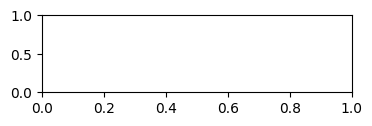

In [ ]:
genes.shape

In [ ]:
def getPathwayByGene(geneID, orgID='afm'):
    try:
        pth = pd.read_csv(f'https://rest.kegg.jp/link/pathway/{orgID}:{geneID}',
                          sep='\t', header=None)
    except:
        return {}
    return {geneID : pth[1].tolist()}

In [ ]:
getPathwayByGene('AFUA_1G02510')

{}